Load Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


Normalize and flatten

In [2]:
# Normalize the images to have values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0
# Flatten the 28x28 images into 1D vectors of size 784
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

print(f'Flattened training data shape: {X_train.shape}')
print(f'Flattened testing data shape: {X_test.shape}')


Flattened training data shape: (60000, 784)
Flattened testing data shape: (10000, 784)


Visualize some examples

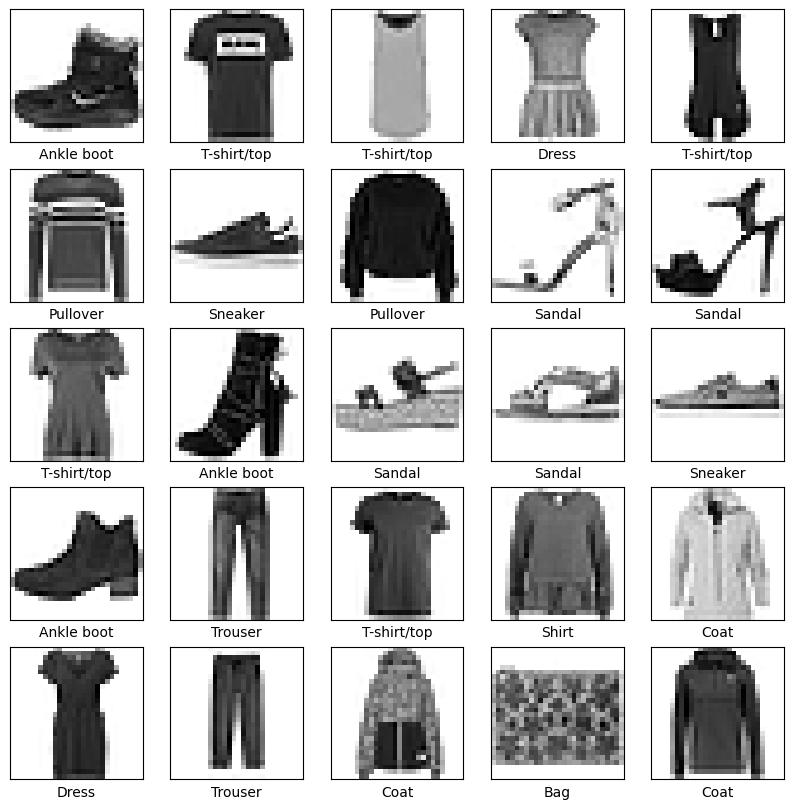

In [3]:
import matplotlib.pyplot as plt

# Define the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot some images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


Construct ANN

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define the model architecture
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dropout(0.15),
    Dense(128, activation='relu'),
    Dropout(0.15),
    Dense(64, activation='relu'),
    Dropout(0.15),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,898 (491.79 KB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

Define callbacks and fit model

In [19]:
# Define early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
def scheduler(epoch, lr):
    if epoch > 25:
        return lr * 0.5
    return lr
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2,
                    callbacks=[early_stopping, lr_scheduler])


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9067 - loss: 0.2545 - val_accuracy: 0.8884 - val_loss: 0.3121 - learning_rate: 0.0010
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9062 - loss: 0.2538 - val_accuracy: 0.8944 - val_loss: 0.3186 - learning_rate: 0.0010
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9052 - loss: 0.2508 - val_accuracy: 0.8836 - val_loss: 0.3416 - learning_rate: 0.0010
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9060 - loss: 0.2531 - val_accuracy: 0.8914 - val_loss: 0.3118 - learning_rate: 0.0010
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9092 - loss: 0.2461 - val_accuracy: 0.8957 - val_loss: 0.3141 - learning_rate: 0.0010
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9082 - loss: 0.2474 - val_accuracy: 0.8928 - val_loss: 0.3374 - learning_rate: 0.0010
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9

Eval on Test set

In [21]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 0s - 1ms/step - accuracy: 0.8845 - loss: 0.3453
Test accuracy: 0.8845000267028809


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.81      0.80      1000
       Dress       0.89      0.88      0.88      1000
        Coat       0.75      0.85      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.76      0.63      0.69      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



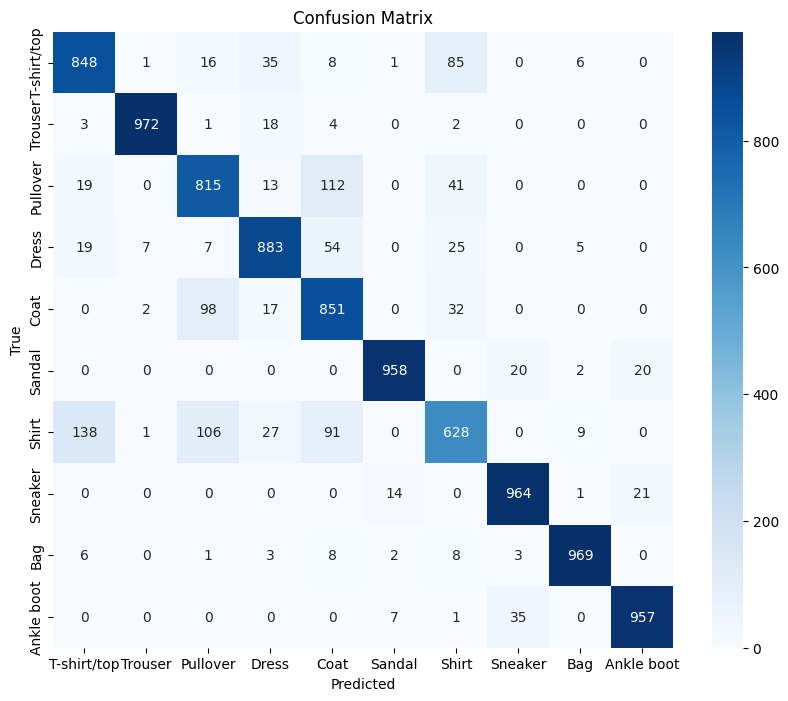

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the labels
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)

# Print Classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification report plots

Exception ignored in: <function _xla_gc_callback at 0x7d4efde86b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


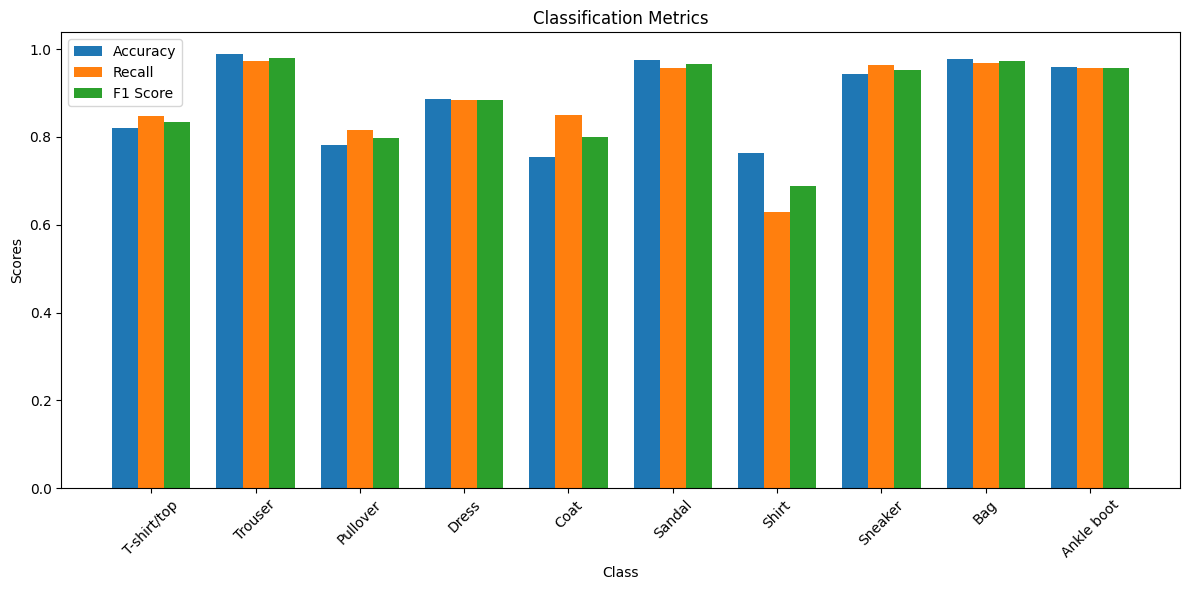

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Extract data for plotting
accuracy = [report[label]['precision'] for label in class_names]
recall = [report[label]['recall'] for label in class_names]
f1_score = [report[label]['f1-score'] for label in class_names]


# Setting the positions and width for the bars
positions = np.arange(len(class_names))
width = 0.25

# Plotting
plt.figure(figsize=(12, 6))

# Bar for accuracy
plt.bar(positions - width, accuracy, width=width, label='Accuracy')

# Bar for recall
plt.bar(positions, recall, width=width, label='Recall')

# Bar for F1 score
plt.bar(positions + width, f1_score, width=width, label='F1 Score')

# Formatting the plot
plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Classification Metrics')
plt.xticks(positions, class_names, rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


Loss and accuracy curves

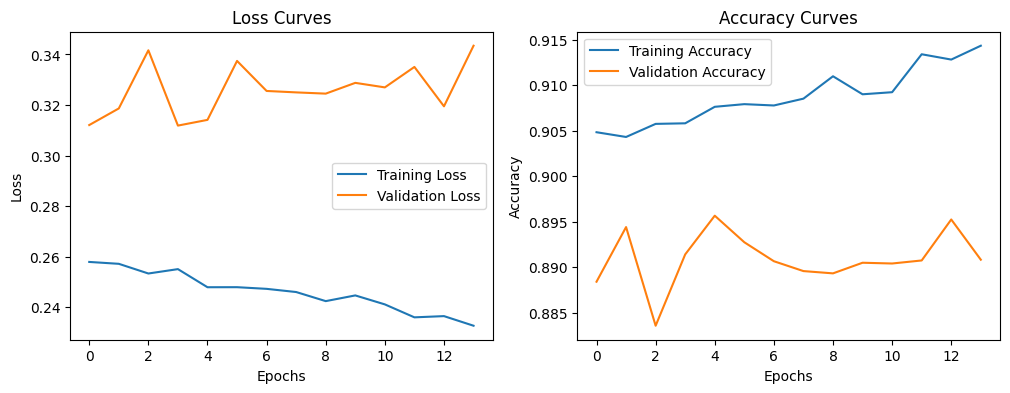

In [24]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.show()